In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv("F:framingham.csv")

In [4]:
# First look
print(data.head())


   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


In [6]:
print(data.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [9]:
X = data.drop("TenYearCHD", axis=1)  # features
y = data["TenYearCHD"]               # target (0 = No, 1 = Yes)

In [10]:
# Fill missing values with column mean (simple approach)
X = X.fillna(X.mean())

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


C:\Users\nikit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8490566037735849
Random Forest Accuracy: 0.8431603773584906

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       719
           1       0.33      0.03      0.06       129

    accuracy                           0.84       848
   macro avg       0.59      0.51      0.49       848
weighted avg       0.77      0.84      0.78       848



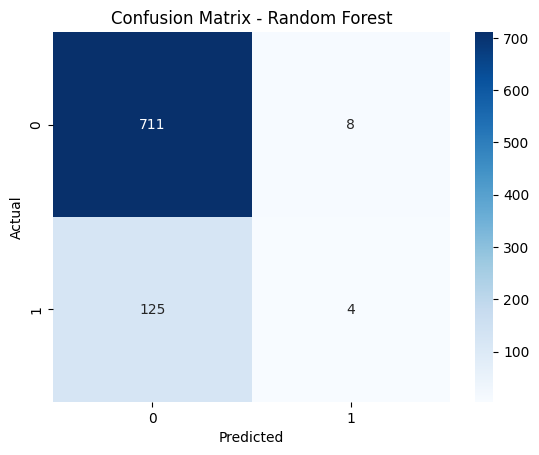

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


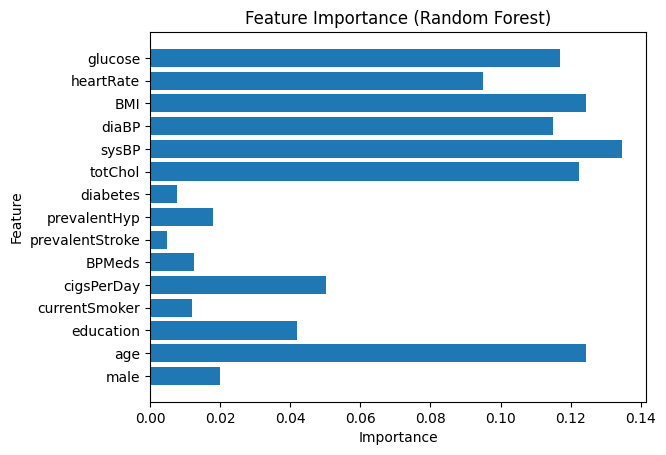

In [15]:
importances = rf.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()


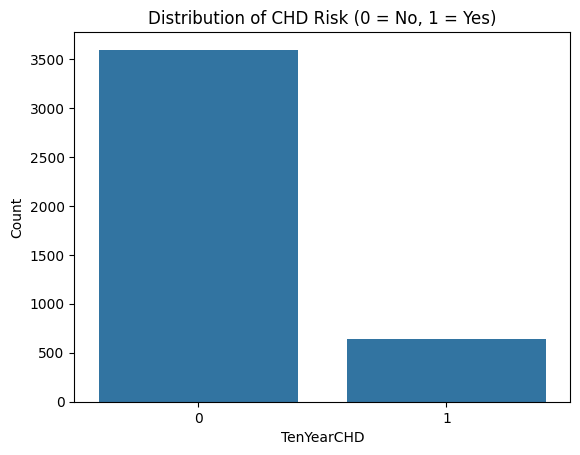

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Distribution of CHD Risk (0 = No, 1 = Yes)")
plt.xlabel("TenYearCHD")
plt.ylabel("Count")
plt.show()


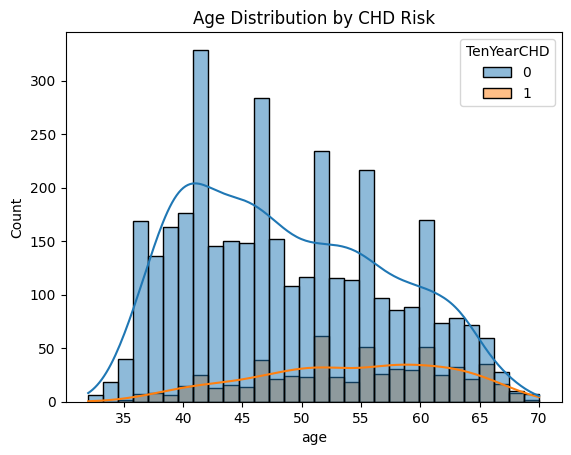

In [17]:
sns.histplot(data=data, x="age", hue="TenYearCHD", kde=True, bins=30)
plt.title("Age Distribution by CHD Risk")
plt.show()


Age Distribution by CHD Risk

See how age differs between people with/without CHD.


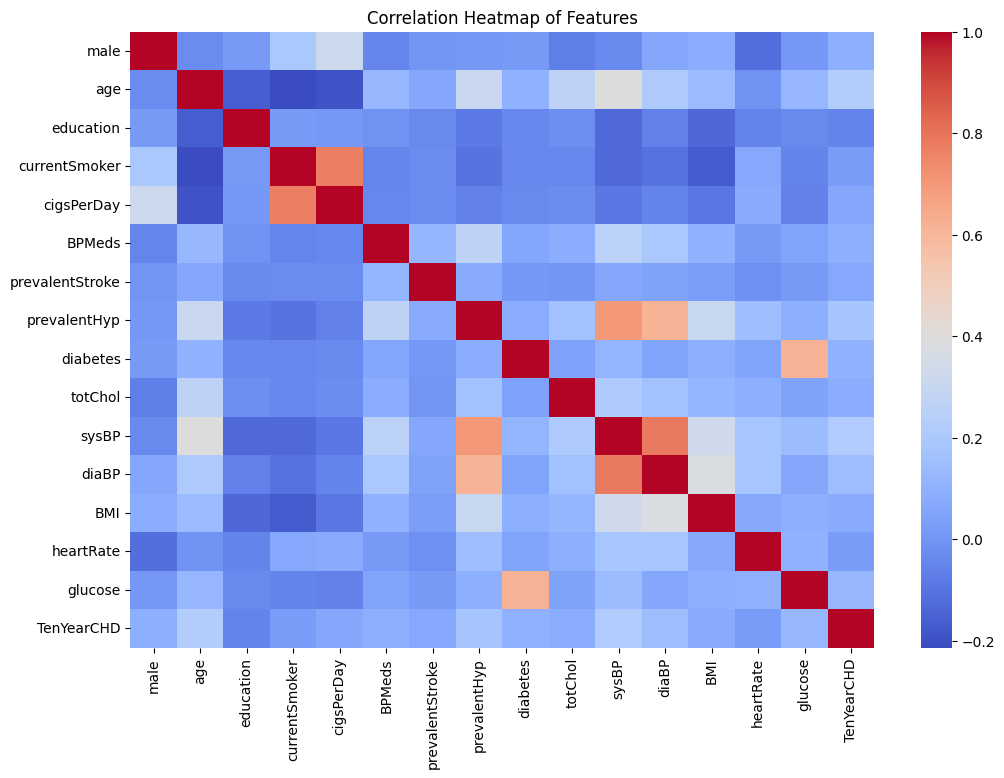

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()


I got higest accuracy by Logistic Regression, so I selected Logistic Regressionfor this model

Conclusion

Logistic Regression performed with an accuracy of [insert accuracy]% on your dataset.

It is simple, interpretable, and effective for binary classification problems.

While it may not capture complex non-linear patterns, it provides a solid baseline model and insight into feature importance.

Recommended for datasets with clear, linear relationships between features and outcome, and when interpretability is important.


1. Features of Logistic Regression

Binary Classification: Primarily used for predicting categorical outcomes, e.g., Yes/No, 0/1, Survived/Not Survived.

Probabilistic Output: Gives probability of class membership (e.g., 0.75 probability of “Yes”).

Linear Relationship with Log-Odds: Models the relationship between independent variables and the log-odds of the dependent variable.

Handles Multiple Predictors: Can work with multiple independent variables, both continuous and categorical.

Simple and Interpretable: Coefficients indicate the strength and direction of the relationship between features and the target.

2. Advantages of Logistic Regression

Easy to implement and interpret.

Efficient on small datasets and low computational requirements.

Probabilistic prediction allows threshold adjustments for better control over precision and recall.

Works well when the relationship between features and outcome is approximately linear in log-odds.

Can handle both continuous and categorical independent variables.

3. Disadvantages of Logistic Regression

Assumes linearity between independent variables and log-odds: Non-linear relationships reduce performance.

Sensitive to outliers which can skew predictions.

Not suitable for complex relationships: Cannot capture complex patterns like random forests or neural networks.

Multicollinearity issue: Highly correlated features can reduce reliability of coefficient estimates.

Limited to classification tasks: Cannot directly predict continuous outcomes.

4. Workflow for Logistic Regression

Data Collection & Cleaning: Handle missing values, encode categorical variables, normalize if needed.

Feature Selection: Choose independent variables relevant to the target variable.

Train-Test Split: Divide data into training and testing sets (e.g., 80:20).

Model Training: Fit the Logistic Regression model on the training data.

Prediction: Predict class labels or probabilities on test data.

Evaluation: Use metrics like Accuracy, Precision, Recall, F1-score, ROC-AUC.

Interpretation & Conclusion: Analyze coefficients, understand feature impact, and evaluate overall model performance.